In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings # 경고메세지 무시
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('titanic.csv')
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# 변수들

categorical_feats = list(set(list(data.select_dtypes("object").columns) + list(data.select_dtypes("bool").columns) + list(data.select_dtypes("category").columns)))
numerical_feats = list(set(list(data.select_dtypes("int").columns) + list(data.select_dtypes("float").columns)))
# include_word_feats1 = [s for s in data if "변수에 포함된 단어" in s]
# include_word_feats2 = [s for s in data if "변수에 포함된 단어" in s]

In [ ]:
# 컬럼 타입 변경

# data.astype({'컬럼명':'float', '컬럼명':'float'}).dtypes

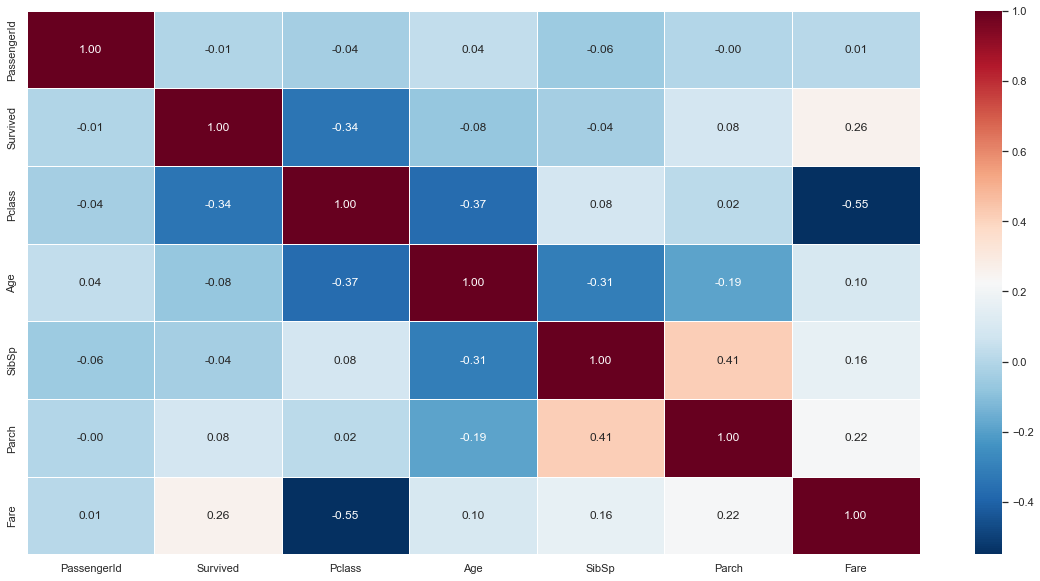

In [31]:
# 상관계수 히트맵, data부분을 변경하면 됨

sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(data = data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdBu_r')
plt.show()

In [14]:
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
